<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/WPOMgeneradorDatosCovidSerieRenave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de la frecuencia diaria de casos hospitalizados a partir de datos CNE RENAVE

codigo para descargar el fichero, filtrar los datos de una comunidad entre diferentes fechas, recontar el numero de casos diarios hospitalizados.



```
# Tiene formato de código
```
https://www.pythoncheatsheet.org/

## Pasos previos. librerias y  configuración

In [ ]:
# Importamos ls librería de Python que necesitaremos en este notebook

import pandas as pd  # Pandas permite manipular tablas 
import matplotlib.pyplot as plt  # Para hacer gráficas
import seaborn as sns  # Para hacer gráficas pero necesita matplotlib y deja unos graficos chulisismos 
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn

# Redondeamos las salidas a dos decimales
%precision %.2f

# from google.colab import drive
# drive.mount('/content/drive')

'%.2f'

In [ ]:
# datos:  casos_hosp_uci_def_sexo_edad_provres.csv: Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.
# Cargamos los datos en un DataFrame de Pandas en la variable 'data'
# si El ficheros tiene formato CSV

data = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv')
data  # Al poner el nombre de la variable se muestra su contenido por pantalla

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715495,ZA,NC,50-59,2021-03-25,0,0,0,0
715496,ZA,NC,60-69,2021-03-25,0,0,0,0
715497,ZA,NC,70-79,2021-03-25,0,0,0,0
715498,ZA,NC,80+,2021-03-25,0,0,0,0


#Carga de datos

In [ ]:
# si lo descargamos directo de la web Ç(ventaja es que con una descarga siempre está accesible y no hay que volver a descargarlo durante la sesión)
!wget https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv 
#Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.


--2021-03-29 10:13:08--  https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21115048 (20M) [application/octet-stream]
Saving to: ‘casos_hosp_uci_def_sexo_edad_provres.csv’

casos_hosp_uci_def_ 100%[===================>]  20.14M  3.24MB/s    in 7.5s    

2021-03-29 10:13:17 (2.67 MB/s) - ‘casos_hosp_uci_def_sexo_edad_provres.csv’ saved [21115048/21115048]



In [ ]:
# Creamos una tabla con Pandas para cada uno de los ficheros

data = pd.read_csv('casos_hosp_uci_def_sexo_edad_provres.csv')
data

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715495,ZA,NC,50-59,2021-03-25,0,0,0,0
715496,ZA,NC,60-69,2021-03-25,0,0,0,0
715497,ZA,NC,70-79,2021-03-25,0,0,0,0
715498,ZA,NC,80+,2021-03-25,0,0,0,0


In [ ]:
print (data.dtypes)


provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object


In [ ]:
resumen=data.groupby(['provincia_iso']).agg(sum)
resumen

,num_casos,num_hosp,num_uci,num_def
provincia_iso,,,,
A,143891,11776,1152,2645
AB,26969,3274,372,827
AL,48019,3240,492,720
AV,11118,1485,74,434
B,389789,31976,2540,9685
BA,46320,3251,301,890
BI,82255,8806,732,2179
BU,30228,3512,325,783
C,51847,5944,930,1071


#Filtrar los registros de una o varias provincias entre determinadas fechas
Tengo un dataframe con algunas columnas de numeros enteros, otra de fecha (aspecto de fecha pero no se si reconocida como string) y otras que son cadena o string (no lo se). quiero filtrar las filas :

 a) cuyo valor en la columna de texto coincida con alguno de los valores texto en un vector de filtro (tres o cuatro valores a seleccionar OR)
 
 b) cuyo valor en una columna de numero o fecha esté en un rango de valores de filtrado (o coincida exacto con algunos valores, como en el caso a)). Puedo pasarte el escipt de base si te parece más cómodo

¿como concatenar los valores de una columna de numeros para que queden como una "celda" con todos los numeros separados por comas ? en el fondo es como exportar a csv, pues es el resultado final (un texto de numeros separado con comas), pero para presentar esos valores en pantalla

In [ ]:

data2 = data[(data['provincia_iso'] =='V') | (data['provincia_iso'] =='A')| (data['provincia_iso'] =='CS')]
data2 = data2[(data['sexo'] =='H') | (data['sexo'] =='M')]
data2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [ ]:
data3 = data[data['provincia_iso'] =='V']
data3 = data3[(data['sexo'] =='H') | (data['sexo'] =='M')]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
1440,V,H,0-9,2020-01-01,0,0,0,0
1441,V,H,10-19,2020-01-01,0,0,0,0
1442,V,H,20-29,2020-01-01,0,0,0,0
1443,V,H,30-39,2020-01-01,0,0,0,0
1444,V,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [123]:

start_date = '2020-09-01'
end_date = '2021-03-24'
after_start_date = data3['fecha'] >= start_date
before_end_date = data3['fecha'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates3 = data3.loc[between_two_dates]
filtered_dates3


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
389400,V,H,0-9,2020-09-01,10,0,0,0
389401,V,H,10-19,2020-09-01,21,0,0,0
389402,V,H,20-29,2020-09-01,32,0,0,0
389403,V,H,30-39,2020-09-01,28,0,0,0
389404,V,H,40-49,2020-09-01,26,2,0,1
...,...,...,...,...,...,...,...,...
713775,V,M,50-59,2021-03-24,1,0,0,0
713776,V,M,60-69,2021-03-24,0,0,0,0
713777,V,M,70-79,2021-03-24,2,0,0,0
713778,V,M,80+,2021-03-24,1,0,0,0


In [124]:
total3=filtered_dates3.groupby(['provincia_iso'], as_index=False).agg(sum)
#as index false es vital para que no cree una serie sino un dataframe donde pueda apuntar a las variables https://realpython.com/pandas-groupby/
total3

,provincia_iso,num_casos,num_hosp,num_uci,num_def
0,V,183499,13628,1092,2843


In [125]:
total_byagegen3=filtered_dates3.groupby(['sexo','grupo_edad'], as_index=False).agg(sum)
total_byagegen3['prop_hospcaso']=total_byagegen3['num_hosp']/total_byagegen3['num_casos']
total_byagegen3['prop_ucihosp']=total_byagegen3['num_uci']/total_byagegen3['num_hosp']
total_byagegen3['prop_defhosp']=total_byagegen3['num_def']/total_byagegen3['num_hosp']
total_byagegen3

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def,prop_hospcaso,prop_ucihosp,prop_defhosp
0,H,0-9,7101,32,0,0,0.004506,0.000000,0.000000
1,H,10-19,10495,43,1,0,0.004097,0.023256,0.000000
2,H,20-29,11543,134,8,0,0.011609,0.059701,0.000000
3,H,30-39,11628,323,21,2,0.027778,0.065015,0.006192
4,H,40-49,15300,851,71,17,0.055621,0.083431,0.019976
5,H,50-59,13255,1307,162,60,0.098604,0.123948,0.045907
6,H,60-69,8986,1501,227,203,0.167038,0.151233,0.135243
7,H,70-79,5588,1571,221,397,0.281138,0.140675,0.252705
8,H,80+,4003,1741,45,875,0.434924,0.025847,0.502585
9,H,NC,6,1,0,0,0.166667,0.000000,0.000000


In [91]:
print (total_byagegen3.dtypes)

sexo              object
grupo_edad        object
num_casos          int64
num_hosp           int64
num_uci            int64
num_def            int64
prop_hospcaso    float64
prop_ucihosp     float64
prop_defhosp     float64
dtype: object


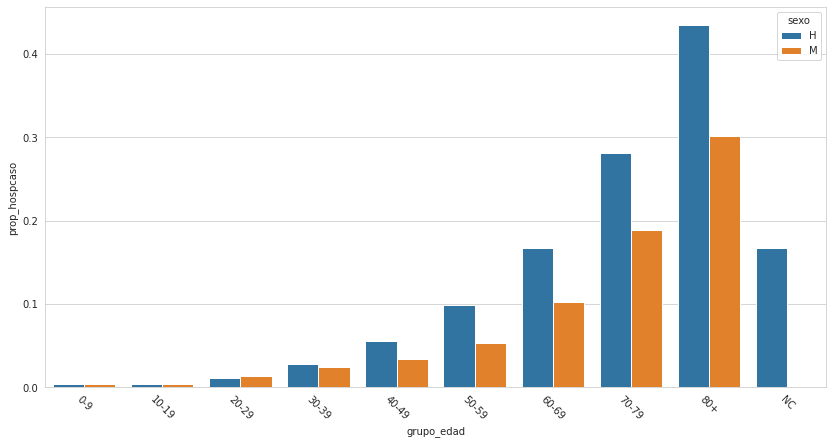

Text(0.5, 1.0, 'Proporción de hospitalizados sobre casos provincia de valencia sept20 a marzo 21. Fuente CNE')

In [97]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x='grupo_edad', y='prop_hospcaso', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
plt.show()
ax.set_title('Proporción de hospitalizados sobre casos provincia de valencia sept20 a marzo 21. Fuente CNE')
# ax.set_ylabel('lololo')


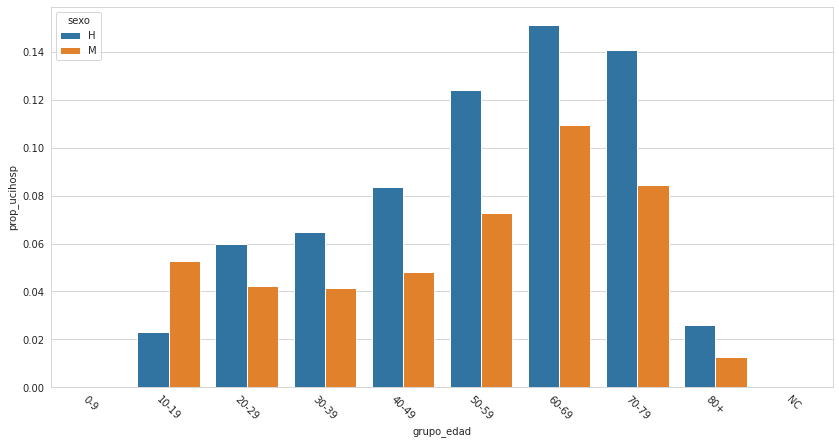

Text(0.5, 1.0, 'Proporción de pacientes UCI sobre hospitalizados provincia de valencia sept20 a marzo 21. Fuente CNE')

In [109]:
sns.color_palette("tab10")
plt.figure(figsize=(14,7))
ax=sns.barplot(x='grupo_edad', y='prop_ucihosp', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
plt.show()
ax.set_title('Proporción de pacientes UCI sobre hospitalizados provincia de valencia sept20 a marzo 21. Fuente CNE')

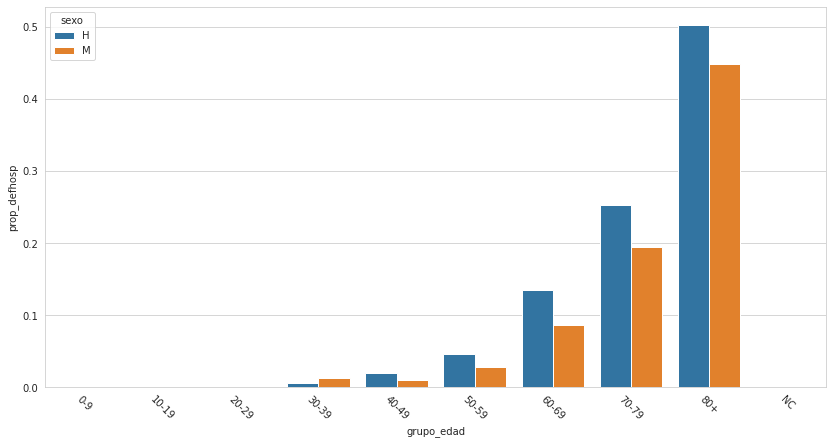

Text(0.5, 1.0, 'Proporción de defunciones sobre hospitalizados provincia de valencia sept20 a marzo 21. Fuente CNE')

In [100]:
sns.color_palette("Set2")
plt.figure(figsize=(14,7))
ax=sns.barplot(x='grupo_edad', y='prop_defhosp', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
plt.show()
ax.set_title('Proporción de defunciones sobre hospitalizados provincia de valencia sept20 a marzo 21. Fuente CNE')

Text(0.5, 1.0, 'Proporción de defunciones sobre hospitalizados')

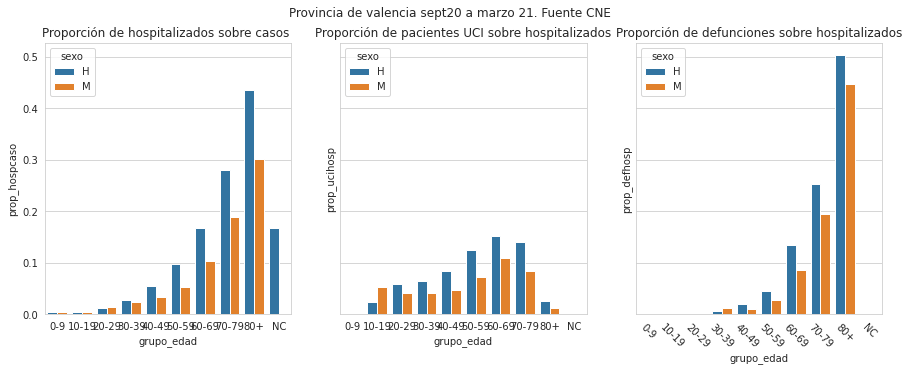

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Provincia de valencia sept20 a marzo 21. Fuente CNE')

# Hosp
sns.barplot(ax=axes[0],x='grupo_edad', y='prop_hospcaso', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
axes[0].set_title('Proporción de hospitalizados sobre casos ')

# # UCi
ax=sns.barplot(ax=axes[1],x='grupo_edad', y='prop_ucihosp', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
axes[1].set_title('Proporción de pacientes UCI sobre hospitalizados')


# # Def
ax=sns.barplot(ax=axes[2],x='grupo_edad', y='prop_defhosp', hue='sexo', data=total_byagegen3)
plt.xticks(rotation=-45)
axes[2].set_title('Proporción de defunciones sobre hospitalizados')


In [92]:
total_byage3=filtered_dates3.groupby(['grupo_edad'], as_index=False).agg(sum)
total_byage3['prop_hospcaso']=total_byage3['num_hosp']/total_byage3['num_casos']
total_byage3['prop_ucihosp']=total_byage3['num_uci']/total_byage3['num_hosp']
total_byage3['prop_defhosp']=total_byage3['num_def']/total_byage3['num_hosp']
total_byage3
### representar visualmente los resultados para comparar homres y mujeres por rando de edad

,grupo_edad,num_casos,num_hosp,num_uci,num_def,prop_hospcaso,prop_ucihosp,prop_defhosp
0,0-9,14056,62,0,0,0.004411,0.000000,0.000000
1,10-19,20668,81,3,0,0.003919,0.037037,0.000000
2,20-29,23810,300,15,0,0.012600,0.050000,0.000000
3,30-39,24485,637,34,6,0.026016,0.053375,0.009419
4,40-49,31769,1414,98,23,0.044509,0.069307,0.016266
5,50-59,27605,2077,218,82,0.075240,0.104959,0.039480
6,60-69,18231,2452,331,285,0.134496,0.134992,0.116232
7,70-79,11872,2755,321,628,0.232059,0.116515,0.227949
8,80+,10995,3849,72,1819,0.350068,0.018706,0.472590
9,NC,8,1,0,0,0.125000,0.000000,0.000000


Text(0.5, 1.0, 'Proporción de defunciones sobre hospitalizados')

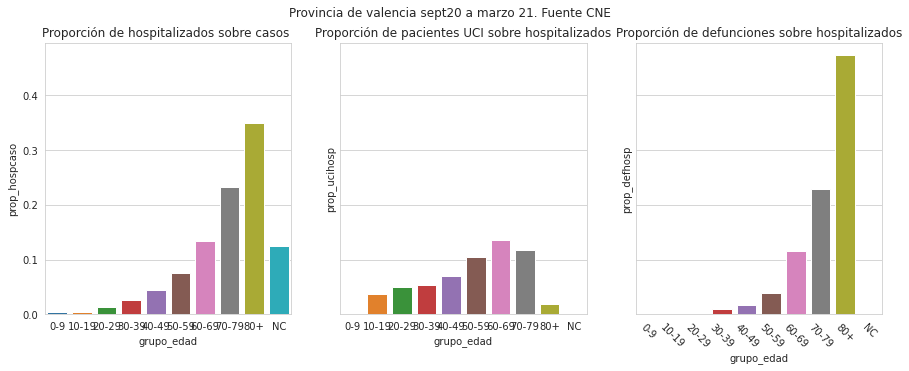

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Provincia de valencia sept20 a marzo 21. Fuente CNE')

# Hosp
sns.barplot(ax=axes[0],x='grupo_edad', y='prop_hospcaso', data=total_byage3)
plt.xticks(rotation=-45)
axes[0].set_title('Proporción de hospitalizados sobre casos ')

# # UCi
ax=sns.barplot(ax=axes[1],x='grupo_edad', y='prop_ucihosp', data=total_byage3)
plt.xticks(rotation=-45)
axes[1].set_title('Proporción de pacientes UCI sobre hospitalizados')


# # Def
ax=sns.barplot(ax=axes[2],x='grupo_edad', y='prop_defhosp', data=total_byage3)
plt.xticks(rotation=-45)
axes[2].set_title('Proporción de defunciones sobre hospitalizados')

In [93]:
start_date = '2020-09-01'
end_date = '2021-03-25'
after_start_date = data2['fecha'] >= start_date
before_end_date = data2['fecha'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2 = data2.loc[between_two_dates]
filtered_dates2

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
387960,A,H,0-9,2020-09-01,6,0,0,0
387961,A,H,10-19,2020-09-01,13,0,0,0
387962,A,H,20-29,2020-09-01,15,0,0,0
387963,A,H,30-39,2020-09-01,20,0,0,0
387964,A,H,40-49,2020-09-01,18,1,0,0
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [94]:
resumen2=filtered_dates2.groupby(['provincia_iso'], as_index=False).agg(sum)
resumen2

,provincia_iso,num_casos,num_hosp,num_uci,num_def
0,A,135648,9235,811,2130
1,CS,36023,2519,290,537
2,V,183499,13628,1092,2843


# distribución de datos para generador. Solo provincia de Valencia

In [126]:
##me falta solo concatenar con separación de comas la suma de casos por dia
generar_datos=filtered_dates3.groupby(['fecha'], as_index=False).agg(sum)
generar_datos

,fecha,num_casos,num_hosp,num_uci,num_def
0,2020-09-01,341,26,2,2
1,2020-09-02,380,22,5,4
2,2020-09-03,294,28,4,5
3,2020-09-04,351,28,1,3
4,2020-09-05,337,22,2,4
...,...,...,...,...,...
200,2021-03-20,38,15,1,0
201,2021-03-21,36,5,1,0
202,2021-03-22,42,7,0,1
203,2021-03-23,98,8,1,0


In [129]:
','.join(generar_datos['fecha'])
#convertir columna de numeros a columna de string
#luego usar join par concatenarlos con el separados que no se aplica en la primera ni la ultima

'2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-3

## Otros análisis

# Referencias

* https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos
* https://likegeeks.com/es/tutorial-de-python-pandas/